# Body Measurements data from kaggle

Exploring a body measurements dataset I downloaded from kaggle. I'm hoping to find a good dataset to use for a clothing design pattern-making project.

##### Imports

In [3]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### read in data

In [4]:
df = pd.read_csv("./BodyMeasurements.csv")
df.head()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,1.0,30,22,18,20,18,14,22,22,25,25,22,52
1,1.0,28,19,22,17,18,21,25,28,23,25,20,56
2,2.0,27,21,18,16,14,10,15,21,18,14,18,53
3,1.0,29,20,20,18,11,19,14,24,21,20,21,45
4,2.0,28,16,14,18,13,11,30,25,22,32,13,47


#### divide shoulder width by (center to shoulder measurement)

In [5]:
df.ShoulderWidth.apply(lambda x: x/2)

0       9.0
1      11.0
2       9.0
3      10.0
4       7.0
       ... 
711     3.0
712     5.5
713     8.5
714     7.5
715     7.5
Name: ShoulderWidth, Length: 716, dtype: float64

#### get info on the dataframe

In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             715 non-null    float64
 1   Age                716 non-null    int64  
 2   HeadCircumference  716 non-null    int64  
 3   ShoulderWidth      716 non-null    int64  
 4   ChestWidth         716 non-null    int64  
 5   Belly              716 non-null    int64  
 6   Waist              716 non-null    int64  
 7   Hips               716 non-null    int64  
 8   ArmLength          716 non-null    int64  
 9   ShoulderToWaist    716 non-null    int64  
 10  WaistToKnee        716 non-null    int64  
 11  LegLength          716 non-null    int64  
 12  TotalHeight        716 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 72.8 KB


#### convert gender datatype to a string

In [7]:
df['Gender'] = df['Gender'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             716 non-null    object
 1   Age                716 non-null    int64 
 2   HeadCircumference  716 non-null    int64 
 3   ShoulderWidth      716 non-null    int64 
 4   ChestWidth         716 non-null    int64 
 5   Belly              716 non-null    int64 
 6   Waist              716 non-null    int64 
 7   Hips               716 non-null    int64 
 8   ArmLength          716 non-null    int64 
 9   ShoulderToWaist    716 non-null    int64 
 10  WaistToKnee        716 non-null    int64 
 11  LegLength          716 non-null    int64 
 12  TotalHeight        716 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 72.8+ KB


#### replace gender data

In [8]:
df['Gender'].replace({'1.0':'M'}, inplace=True)
df['Gender'].replace({'2.0':'F'}, inplace=True)
df.head()

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
0,M,30,22,18,20,18,14,22,22,25,25,22,52
1,M,28,19,22,17,18,21,25,28,23,25,20,56
2,F,27,21,18,16,14,10,15,21,18,14,18,53
3,M,29,20,20,18,11,19,14,24,21,20,21,45
4,F,28,16,14,18,13,11,30,25,22,32,13,47


#### scatter plot 

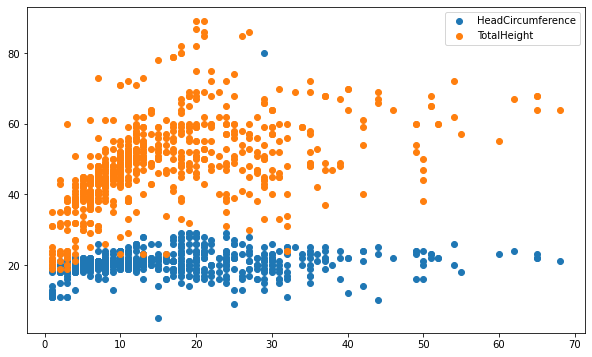

In [9]:
plt.figure(figsize=(10, 6), dpi=72)
plt.scatter(df['Age'], df['HeadCircumference'])
plt.scatter(df['Age'], df['TotalHeight'])
plt.legend(['HeadCircumference', 'TotalHeight'])

#### one of the headCircumference datapoints looks like an outlier, lets look at it a different way

In [10]:
df.describe()

,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,15.340782,20.574022,14.317039,14.569832,20.199721,19.265363,19.378492,18.817039,17.900838,16.560056,26.833799,48.118715
std,11.831501,3.743353,4.762181,5.314646,10.132993,8.770706,8.745223,5.376592,5.379313,5.204411,7.925988,12.156722
min,1.000000,5.000000,4.000000,6.000000,5.000000,2.000000,7.000000,6.000000,1.000000,4.000000,9.000000,19.000000
25%,7.000000,19.000000,11.000000,11.000000,15.000000,12.000000,12.000000,16.000000,13.000000,13.000000,21.000000,40.000000
50%,11.000000,20.000000,14.000000,13.000000,20.000000,20.000000,18.000000,19.000000,17.500000,16.000000,26.000000,48.000000
75%,21.000000,22.000000,18.000000,17.000000,23.000000,23.000000,24.000000,22.000000,22.000000,20.000000,32.000000,55.000000
max,68.000000,80.000000,87.000000,38.000000,213.000000,91.000000,63.000000,66.000000,39.000000,45.000000,50.000000,89.000000


#### yep, looks like an outlier, let's look at that row

In [11]:
df.loc[df.HeadCircumference == 80]

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
21,F,29,80,19,16,17,20,20,24,22,19,20,44


#### drop the outlier row

In [12]:
df.drop(df[df['HeadCircumference'] == 80].index, inplace = True)

#### let's find other outlier rows

In [13]:
df.loc[df.ShoulderWidth > 30]

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
248,F,2,11,87,15,13,12,14,9,9,6,13,19


#### Some of the column names had spaces, let's remove those:

In [14]:
df.columns = df.columns.str.replace(' ', '')

In [15]:
df.drop(df[df['ShoulderWidth'] == 87].index, inplace = True)

In [16]:
df.loc[df.HeadCircumference < 15]

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
35,F,19,14,22,18,17,13,20,19,18,13,27,47
125,F,42,14,10,12,9,49,17,20,25,17,13,54
126,M,40,12,14,11,18,36,17,21,23,16,27,64
128,M,29,13,18,17,23,19,13,20,21,19,30,67
135,M,25,13,22,14,12,20,22,21,19,19,22,57
136,M,32,11,11,19,14,21,21,15,21,22,30,48
139,F,26,13,14,13,11,17,17,19,20,30,30,47
140,F,44,10,16,10,19,31,16,20,19,20,29,66
141,M,25,9,17,7,10,29,14,17,18,18,19,49
142,M,15,14,18,9,9,12,15,19,20,21,20,54


#### I'm going to drop 'nan' gender values because there's only one row

In [17]:
df.drop(df[df['Gender'] == 'nan'].index, inplace = True)

#### Drop some outlier head circumference data, it's sort of arbitrary

In [18]:
#get bad head circumference data
badData = df[(df['HeadCircumference'] < 20) & (df['Age'] > 10)].index
#drop the bad head circumference data
df.drop(badData, inplace=True)

#### tests for accuracy

In [19]:
df.loc[df['ChestWidth'] > 30]

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
262,F,19,29,19,31,28,28,28,30,26,30,46,68
268,F,25,26,20,37,28,26,27,28,28,27,42,74
269,M,26,26,20,38,27,28,27,27,26,25,40,85
270,M,27,28,20,31,30,32,38,30,28,27,41,86
271,F,20,29,20,32,28,32,32,28,29,29,42,89
298,M,21,26,17,38,27,28,27,27,26,25,40,85
299,F,21,25,18,32,28,31,31,28,27,26,41,86
300,M,21,26,20,31,30,32,26,29,28,29,42,89
323,M,19,28,26,31,28,28,29,30,26,29,42,68
324,F,18,29,19,32,28,27,29,31,26,30,42,67


#### testing the accuracy of this data by checking to see where leg length + torso is longer than total height

In [20]:
df.loc[(df.LegLength + df.ShoulderToWaist) > df.TotalHeight]

,Gender,Age,HeadCircumference,ShoulderWidth,ChestWidth,Belly,Waist,Hips,ArmLength,ShoulderToWaist,WaistToKnee,LegLength,TotalHeight
30,M,24,29,20,18,17,18,35,20,20,16,30,31
48,M,25,26,16,14,19,16,19,19,20,21,21,39
59,M,6,17,9,8,8,10,10,11,8,17,19,25
60,M,8,19,15,13,9,15,15,21,24,17,31,50
62,F,54,26,18,13,11,23,16,23,27,22,46,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,F,7,21,11,11,20,22,21,19,12,12,21,31
700,F,6,20,11,10,21,21,20,20,15,13,22,32
701,F,7,20,11,10,20,21,20,18,17,15,15,31
707,M,13,21,8,12,22,14,29,27,22,16,25,23


#### ok, that doesn't make real-world sense. Perhaps the shoulder to waist measurement is a diagonal, not a vertical measurement, but there's no info on kaggle about how these measurements were taken. I may eventually abandon this dataset, as I'm developing significant skepticism in it's accuracy.

### Line plot of Head circumference by age

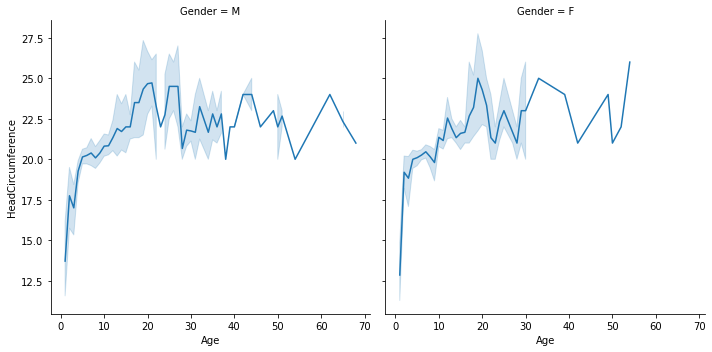

In [21]:
sns.relplot(data=df, x="Age", y="HeadCircumference", kind="line", col="Gender")

### Histogram plot of head circumference

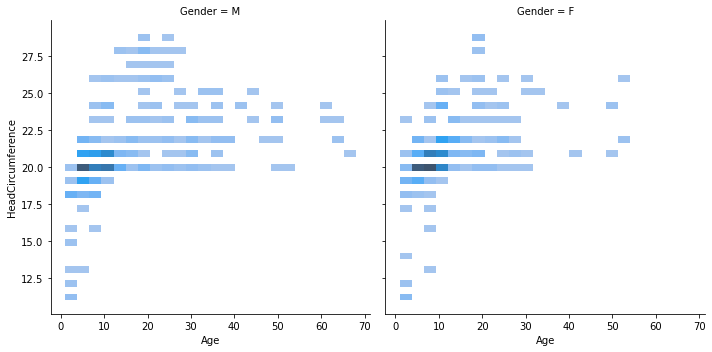

In [22]:
head = sns.displot(data=df, x="Age", y="HeadCircumference", kind="hist", col="Gender")

### Saving file as png file type

In [23]:
head.savefig('head_circumference.png')